In [1]:
# adding autoload so that we dont need to restart kernel to reload libraries every time
%load_ext autoreload
%autoreload 2

In [350]:
from neural_network import *
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [528]:
# creating the dataset
x = np.arange(0,2*np.pi,0.1)
#x = np.random.permutation(x)
y = np.sin(2*x) #+ np.random.normal(scale=0.1, size=len(x))
#y = (np.sin(2*x)>=0)*2-1 + np.random.normal(scale=0.1, size=len(x)) #square
x_test = np.arange(0.05,2*np.pi,0.1)
y_test = np.sin(2*x_test)
#y_test = (np.sin(2*x_test)>=0)*2-1 #square test

In [514]:
#creating the transformation
number_of_rbf_nodes = 63
#means = np.linspace(0, 2*np.pi,number_of_rbf_nodes+2)[1:-1]
means = np.array([np.pi/number_of_rbf_nodes + i*np.pi/number_of_rbf_nodes*2 for i in range(number_of_rbf_nodes)])
#means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
#means = np.sort(np.random.rand(number_of_rbf_nodes)*np.max(x))
#means = x
sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))
#sigmas = np.ones(number_of_rbf_nodes)
sigmas = np.ones(number_of_rbf_nodes)*(1.0/4)
rbf = RbfTransformation(means,sigmas)
#rbf = StepTransformation(means)
new_x = np.zeros((len(x), number_of_rbf_nodes))
new_x_test = np.zeros((len(x_test), number_of_rbf_nodes))
#transforming the x
for i,x_s in enumerate(x):
    new_x[i] = rbf(x_s)
for i,x_s in enumerate(x_test):
    new_x_test[i] = rbf(x_s)

In [515]:
#y = y_noise_sin

In [516]:
# creating the network
nn = NN(number_of_rbf_nodes) # the number of inputs
#nn.add_transformation(rbf) # adding the transformation we created
nn.add_layer(1, function=Linear(), bias_weight=0) #adding a linear layer at the end

In [517]:
# training the network
train_o,test_ = nn.train_batch(new_x,y,63,10000,0.1,0,learning_curve=True)

Text(0, 0.5, 'log(error)')

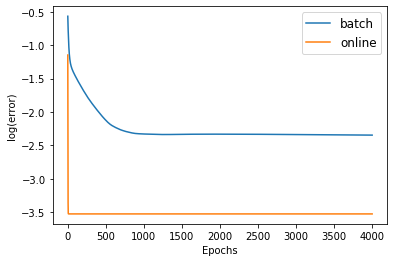

In [501]:
plt.plot(np.log(train_[:4000]), label="batch")
plt.plot(np.log(train_o[:4000]), label='online')
plt.legend()
plt.legend(loc=1,prop={'size': 12})
plt.xlabel('Epochs')
plt.ylabel('log(error)')
#plt.savefig("Lab_2_data/learning_rate.png")

In [536]:
#prediction
ans = []
ans_test = []
ab = 0
for x_s, y_true in zip(x,y):
    v = nn.feed_forward([x_s])[1][0]
    ans.append(v)
#    print("v",v,y_true)
    ab+=np.abs((v-y_true))
ab = ab/len(x)
print(ab)
ans = np.array(ans)
ab = 0
for x_s, y_true in zip(x_test,y_test):
    v = nn.feed_forward([x_s])[1][0]
    ans_test.append(v)
    ab+=np.abs((v-y_true))
ab = ab/len(x_test)
print(ab)
ans = np.array(ans)
ans_test = np.array(ans_test)

0.020899155032502528
0.020849409405685623


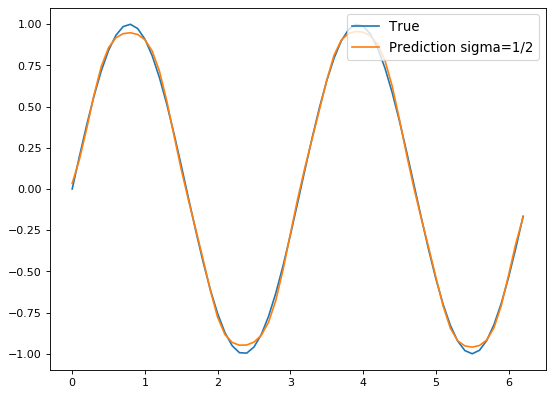

In [537]:
#ploting
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
indexes = np.argsort(x)
plt.plot(x[indexes],y[indexes], label="True")
plt.plot(x[indexes],ans[indexes], label="Prediction sigma=1/2")
#plt.plot(x[indexes],ans_sm[indexes], label="Prediction sigma=1/63")
plt.legend()
plt.legend(loc=1,prop={'size': 12})
#plt.savefig("Lab_2_data/noise_sin_error.png")

In [208]:
ans_63 = ans

TypeError: only integer scalar arrays can be converted to a scalar index

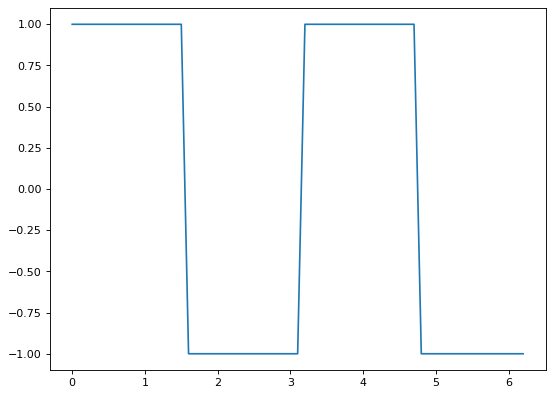

In [249]:
#ploting
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
indexes = np.argsort(x)
plt.plot(x[indexes],y[indexes], label="True")
plt.plot(x[indexes],ans[indexes], label="Prediction")
plt.legend()
#plt.savefig("Lab_2_data/square_zero_error.png")

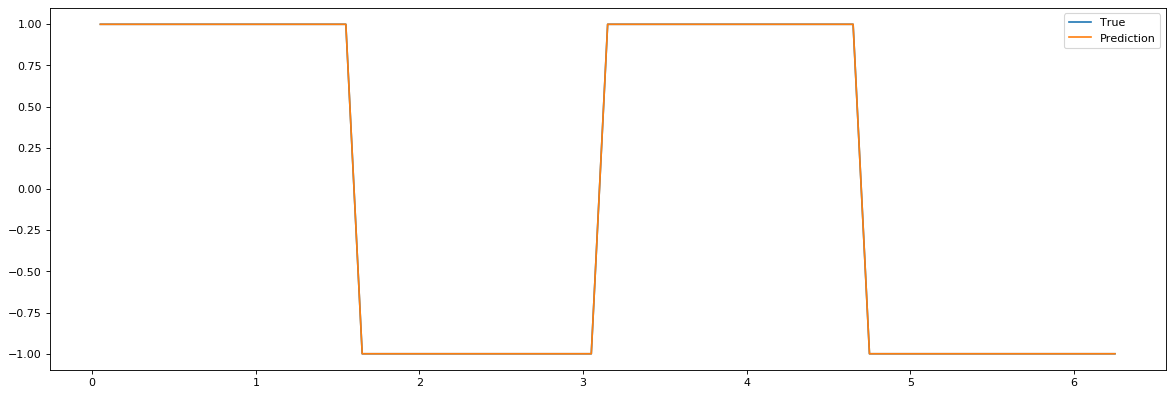

In [129]:
plt.figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_test,y_test, label="True")
plt.plot(x_test,ans_test, label="Prediction")
plt.legend()

In [248]:
#try with a range of rbf nodes
training_test_res = []
sigma_offset = 1.2
for nd in range(4,64):
    number_of_rbf_nodes = nd
    means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
    #means = np.random.rand(nd)*2*np.pi
    sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*sigma_offset))
    rbf = RbfTransformation(means,sigmas)
    #rbf.train_mu_fsca(x,0.05,1000)
    #print(np.sort(rbf.means))
    new_x = np.zeros((len(x), number_of_rbf_nodes))
    new_x_test = np.zeros((len(x_test), number_of_rbf_nodes))
    for i,x_s in enumerate(x):
        new_x[i] = rbf(x_s)
    for i,x_s in enumerate(x_test):
        new_x_test[i] = rbf(x_s)
    nn = NN(number_of_rbf_nodes) # the number of inputs
    nn.add_layer(1, function=Linear(), bias_weight=0) #adding a linear layer at the end
    nn.train_batch(new_x,y,1,10000,0.08,0)
    ans = []
    ab = 0
    for x_s, y_true in zip(new_x,y):
        v = nn.feed_forward(x_s)[1][0]
        ab+=np.abs((v-y_true))
    ab = ab/len(x)
    ans.append(ab)
    ab = 0
    for x_s, y_true in zip(new_x_test,y_test):
        v = nn.feed_forward(x_s)[1][0]
        ab+=np.abs((v-y_true))
    ab = ab/len(x_test)
    ans.append(ab)
    training_test_res.append([nd,ans[0],ans[1]])
    print(nd,ans)
    

4 [0.5274010165825957, 0.5451506154400169]
5 [0.8263759991083897, 0.825036317316203]
6 [0.4293717094551867, 0.41537784826542223]
7 [0.35495853640176755, 0.3525186942682275]
8 [0.27264704976718707, 0.29037731679182105]
9 [0.3899093595273486, 0.39505259799040127]
10 [0.2520097356974074, 0.24309307371880437]
11 [0.2125527052711871, 0.2125854391938449]
12 [0.18219744011309455, 0.19631951632210365]
13 [0.2674279409316252, 0.2743581838928343]
14 [0.18503862915756666, 0.1799967697245338]
15 [0.17001190090471224, 0.1685816372039292]
16 [0.15419768167174627, 0.16380467111107097]
17 [0.1984136894624391, 0.2061248345035887]
18 [0.1637384592759466, 0.1633424186399531]
19 [0.14647369545323563, 0.15220720000168883]
20 [0.1263739899329526, 0.1412540477933111]
21 [0.16518260899141834, 0.17343074156742108]
22 [0.13324722128157196, 0.1402586567480117]
23 [0.12439406618457642, 0.13445436756071238]
24 [0.11513493173947384, 0.1337205250298924]
25 [0.13938246925582967, 0.1507880164216149]
26 [0.123958185672

In [126]:
means = np.random.rand(nd)*2*np.pi
sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))
rbf = RbfTransformation(means,sigmas)
rbf.train_mu_fsca(x,0.05,1000)

In [533]:
nn = NN(1)
nn.add_layer(8)
nn.add_layer(1)
nn.train_batch(x.reshape(-1,1),y,1, 40000, 0.3,0)

(array([], dtype=float64), array([], dtype=float64))

In [185]:
results3

array([[4.00000000e+00, 4.07503648e-01, 4.27908394e-01],
       [5.00000000e+00, 5.71212629e-01, 5.91941387e-01],
       [6.00000000e+00, 3.10222557e-01, 2.96567261e-01],
       [7.00000000e+00, 2.54925170e-01, 2.31918958e-01],
       [8.00000000e+00, 1.83096483e-01, 1.76246012e-01],
       [9.00000000e+00, 1.35506291e-01, 1.30026778e-01],
       [1.00000000e+01, 1.01983176e-01, 9.37252942e-02],
       [1.10000000e+01, 9.81344729e-02, 7.05421664e-02],
       [1.20000000e+01, 8.93528726e-02, 5.67635543e-02],
       [1.30000000e+01, 8.21952157e-02, 4.53705847e-02],
       [1.40000000e+01, 7.44109509e-02, 4.15176294e-02],
       [1.50000000e+01, 7.26728900e-02, 3.89022717e-02],
       [1.60000000e+01, 7.10140810e-02, 4.00591847e-02],
       [1.70000000e+01, 7.15152985e-02, 4.28779043e-02],
       [1.80000000e+01, 7.42860204e-02, 4.29040995e-02],
       [1.90000000e+01, 7.43171161e-02, 3.96346046e-02],
       [2.00000000e+01, 7.16739713e-02, 3.88779434e-02],
       [2.10000000e+01, 7.20887

In [340]:
nn = NN(1)
nn.add_layer(25, function=Sigmoid())
nn.add_layer(3, function=Sigmoid())
nn.add_layer(1, function=Linear())
nn.train_batch(x.reshape(-1,1),y,63,10000,0.08,0)

([], [])

In [341]:
ans = []
ab = 0
for x_s, y_true in zip(x,y):
    v = nn.feed_forward(np.array([x_s]))[1][0]
    ans.append(v)
#    print("v",v,y_true)
    ab+=np.abs((v-y_true))
ab = ab/len(x)
print(ab)
ans = np.array(ans)
ab = 0
for x_s, y_true in zip(x_test,y_test):
    v = nn.feed_forward(np.array([x_s]))[1][0]
    ab+=np.abs((v-y_true))
ab = ab/len(x_test)
print(ab)
ans = np.array(ans)

0.5205644799924453
0.5200013859279955


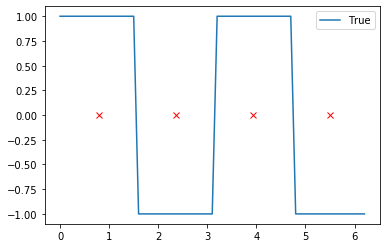

In [493]:
indexes = np.argsort(x)
plt.plot(x[indexes],y[indexes], label="True")
#plt.plot(x[indexes],ans[indexes], label="Prediction")
#plt.savefig("Lab_2_data/run_sq.png")
m = np.array([np.pi/4 + i*np.pi/4*2 for i in range(4)])
plt.plot(m,np.zeros(m.shape),'rx')
plt.legend()

In [45]:
results

array([[4.00000000e+00, 4.27233335e-01, 4.27731142e-01],
       [5.00000000e+00, 5.90356756e-01, 5.90809214e-01],
       [6.00000000e+00, 2.99323336e-01, 2.99976458e-01],
       [7.00000000e+00, 2.35152199e-01, 2.34393678e-01],
       [8.00000000e+00, 1.77795331e-01, 1.77713355e-01],
       [9.00000000e+00, 1.29032276e-01, 1.29525081e-01],
       [1.00000000e+01, 9.09721588e-02, 9.01353373e-02],
       [1.10000000e+01, 6.29385568e-02, 6.27043989e-02],
       [1.20000000e+01, 4.31499657e-02, 4.28320797e-02],
       [1.30000000e+01, 2.97326382e-02, 2.91334500e-02],
       [1.40000000e+01, 2.02410114e-02, 1.99934488e-02],
       [1.50000000e+01, 1.38316022e-02, 1.37157266e-02],
       [1.60000000e+01, 9.63688504e-03, 9.57664850e-03],
       [1.70000000e+01, 6.90010520e-03, 6.94807151e-03],
       [1.80000000e+01, 5.26784403e-03, 5.31429928e-03],
       [1.90000000e+01, 4.26599441e-03, 4.17607423e-03],
       [2.00000000e+01, 3.57169188e-03, 3.51498845e-03],
       [2.10000000e+01, 3.10002

In [34]:
cl_online = results

In [187]:
results4 = np.array(training_test_res)

In [193]:
results_n_on = np.load("Lab_2_data/results_online.npy")

In [196]:
np.save('Lab_2_data/results_noise_online_2.npy', np.array(training_test_res))

In [197]:
results_on = np.array(training_test_res)

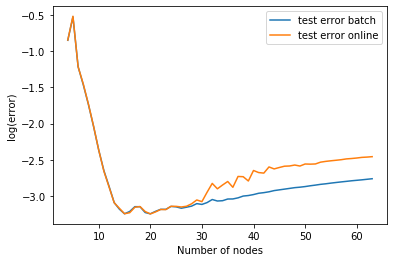

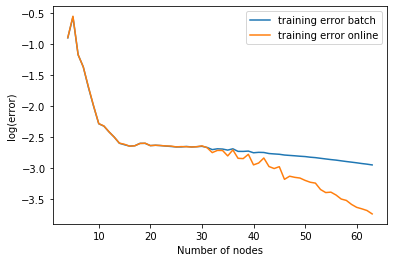

In [202]:
#plt.plot(results[:,0],np.log(results[:,2]), label='test error batch small step')
plt.plot(results[:,0],np.log(results4[:,2]), label='test error batch')
plt.plot(results[:,0],np.log(results_on[:,2]), label='test error online')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('log(error)')
#plt.savefig('Lab_2_data/3_1_test_error_noise_online_batch.png')
plt.figure()
plt.plot(results[:,0],np.log(results4[:,1]), label='training error batch')
plt.plot(results[:,0],np.log(results_on[:,1]), label='training error online')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('log(error)')
#plt.savefig('Lab_2_data/3_1_training_error_noise_online_batch.png')

In [42]:
cl_online[-1]

array([6.30000000e+01, 1.65223661e-02, 1.61003920e-02])

(array([11.,  4.,  8.,  7.,  7.,  3.,  5.,  3.,  5., 10.]),
 array([1.88164307, 2.12520479, 2.36876651, 2.61232823, 2.85588995,
        3.09945168, 3.3430134 , 3.58657512, 3.83013684, 4.07369857,
        4.31726029]),
 <a list of 10 Patch objects>)

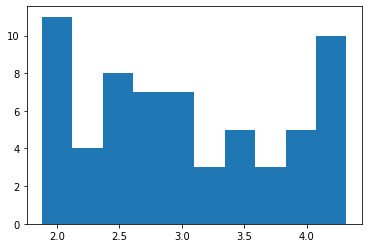

In [68]:
plt.hist(np.sort(rbf.means))

(array([3., 5., 9., 4., 9., 5., 7., 7., 5., 9.]),
 array([1.28653295e-03, 6.22142737e-01, 1.24299894e+00, 1.86385515e+00,
        2.48471135e+00, 3.10556755e+00, 3.72642376e+00, 4.34727996e+00,
        4.96813617e+00, 5.58899237e+00, 6.20984858e+00]),
 <a list of 10 Patch objects>)

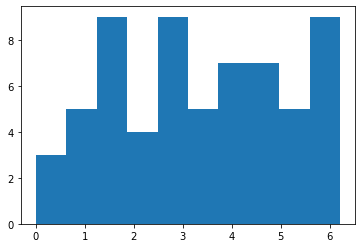

In [94]:

plt.hist(np.sort(rbf.means))

In [44]:
l = None
if l!= None:
    print("works")

In [91]:
range(0,int(np.max(rbf.means)+binsize),binsize)

TypeError: 'float' object cannot be interpreted as an integer

In [84]:
np.max(rbf.means)

6.209848575792064

In [89]:
l = np.max(rbf.means)+binsize

In [90]:
range(0,l)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [155]:
np.random.normal(scale=0.1, size=len(x))

array([-0.16087813,  0.12539571,  0.07225686,  0.11854854,  0.05071398,
       -0.05070739,  0.01246046, -0.05793692, -0.09610551, -0.04152277,
       -0.08170165,  0.16931064, -0.00403849,  0.12287756,  0.18304805,
       -0.02432312,  0.19176029,  0.02703609,  0.08878761, -0.03917745,
        0.05859254,  0.11141027,  0.04078117,  0.01657713, -0.10345388,
        0.22299789,  0.10079064,  0.04205818, -0.11744848,  0.07721451,
       -0.00683029,  0.06288715, -0.04602306,  0.09651728, -0.01187745,
        0.14226088, -0.10059797, -0.14297801, -0.14230844, -0.09488016,
       -0.13421179, -0.15136463,  0.04319881, -0.08589911,  0.04803361,
        0.0300632 ,  0.02723563, -0.0471053 , -0.10529805, -0.1727811 ,
        0.14831723, -0.06741729, -0.10520333,  0.11796932, -0.22353873,
       -0.10867393, -0.12123769,  0.05746705, -0.15285557, -0.22674204,
       -0.0505409 ,  0.01115181, -0.06119455])

In [246]:
np.load("Lab_2_data/")

array([[4.00000000e+00, 4.27233335e-01, 4.27731142e-01],
       [5.00000000e+00, 5.90356756e-01, 5.90809214e-01],
       [6.00000000e+00, 2.99323336e-01, 2.99976458e-01],
       [7.00000000e+00, 2.35152199e-01, 2.34393678e-01],
       [8.00000000e+00, 1.77795331e-01, 1.77713355e-01],
       [9.00000000e+00, 1.29032276e-01, 1.29525081e-01],
       [1.00000000e+01, 9.09721588e-02, 9.01353373e-02],
       [1.10000000e+01, 6.29385568e-02, 6.27043989e-02],
       [1.20000000e+01, 4.31499657e-02, 4.28320797e-02],
       [1.30000000e+01, 2.97326382e-02, 2.91334500e-02],
       [1.40000000e+01, 2.02410114e-02, 1.99934488e-02],
       [1.50000000e+01, 1.38316022e-02, 1.37157266e-02],
       [1.60000000e+01, 9.63688504e-03, 9.57664850e-03],
       [1.70000000e+01, 6.90010520e-03, 6.94807151e-03],
       [1.80000000e+01, 5.26784403e-03, 5.31429928e-03],
       [1.90000000e+01, 4.26599441e-03, 4.17607423e-03],
       [2.00000000e+01, 3.57169188e-03, 3.51498845e-03],
       [2.10000000e+01, 3.10002

In [419]:
ball = np.loadtxt("Lab_2_data/Datasets/ballist.dat")
ball_test = np.loadtxt("Lab_2_data/Datasets/balltest.dat")
x_ball = ball[:,:2]
y_ball = ball[:,2:]
x_test_ball = ball_test[:,:2]
y_test_ball = ball_test[:,2:]

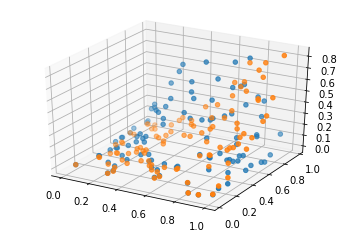

In [357]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x_ball[:,0], ys=x_ball[:,1],zs=y_ball[:,0])
ax.scatter(xs=x_ball[:,0], ys=x_ball[:,1],zs=y_ball[:,1])

In [362]:
nn = NN(2)
nn.add_layer(15, function=Sigmoid())
nn.add_layer(2, function=Linear())
nn.train_batch(x_ball,y_ball,len(x_ball), 1000, 0.2, 0, learning_curve=True)

([array([0.14332315, 0.1389108 ]),
  array([0.14596329, 0.14130931]),
  array([0.14801533, 0.14313766]),
  array([0.14930235, 0.14440106]),
  array([0.15002384, 0.14516169]),
  array([0.15040467, 0.14555812]),
  array([0.15058042, 0.14574387]),
  array([0.15063279, 0.14578806]),
  array([0.15061095, 0.14575211]),
  array([0.15054452, 0.14566143]),
  array([0.15045129, 0.14553691]),
  array([0.15034199, 0.14539213]),
  array([0.15022306, 0.14523529]),
  array([0.15009837, 0.1450713 ]),
  array([0.14997025, 0.14490312]),
  array([0.14984011, 0.14473254]),
  array([0.14970878, 0.14456062]),
  array([0.14957678, 0.144388  ]),
  array([0.14944439, 0.14421506]),
  array([0.1493118 , 0.14404205]),
  array([0.14917913, 0.14386908]),
  array([0.14904643, 0.14369626]),
  array([0.14891375, 0.14352362]),
  array([0.1487811 , 0.14335119]),
  array([0.1486485, 0.143179 ]),
  array([0.14851596, 0.14300705]),
  array([0.14838347, 0.14283535]),
  array([0.14825105, 0.1426639 ]),
  array([0.14811869, 0

In [360]:
nn.feed_forward(x_ball[0])[1],y_ball[0]

(array([0.21130532, 0.31326089]), array([0.093, 0.26 ]))

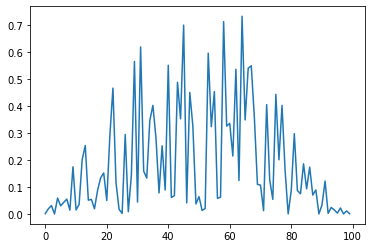

In [373]:
ind = np.argsort(x_ball[:,0])
plt.plot(y_ball[ind,0])

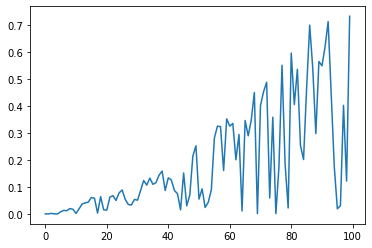

In [374]:
ind = np.argsort(x_ball[:,1])
plt.plot(y_ball[ind,0])

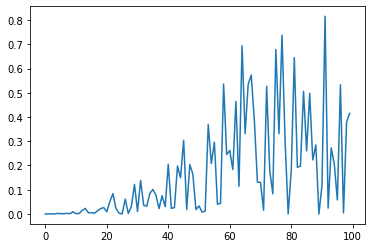

In [375]:
ind = np.argsort(x_ball[:,0])
plt.plot(y_ball[ind,1])

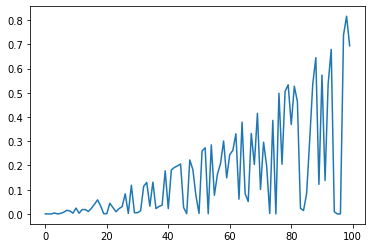

In [376]:
ind = np.argsort(x_ball[:,1])
plt.plot(y_ball[ind,1])

In [388]:
l * np.array([1.5,1])

array([[0.81170132, 0.31888926],
       [0.40314888, 0.22407263],
       [1.13656759, 0.71799779],
       [0.02408827, 0.83941749],
       [0.90376653, 0.0231314 ],
       [1.27295753, 0.11492037],
       [0.17735862, 0.93885144],
       [0.02610932, 0.82804448],
       [0.83633784, 0.67429209],
       [0.45314039, 0.32345414]])

In [479]:
rbf_nodes = 75
sigma_offset = 20
rng = np.max(x_ball,axis=0)-np.min(x_ball,axis=0)
means = (np.random.rand(rbf_nodes,x_ball.shape[1])-0.5)*rng + np.mean(x_ball,axis=0)
sigmas = np.ones(means.shape[0])*np.var(x_ball)/rbf_nodes*sigma_offset
rbf = RbfTransformation(means,sigmas)
rbf.train_mu_fsca(x_ball,0.02,300)
x_ball_rbf = np.zeros((x_ball.shape[0],rbf_nodes))
x_test_ball_rbf = np.zeros((x_test_ball.shape[0],rbf_nodes))
for i,x_s in enumerate(x_ball):
    x_ball_rbf[i] = rbf(x_s)
for i,x_s in enumerate(x_test_ball):
    x_test_ball_rbf[i] = rbf(x_s)


train er [0.00894958 0.00563488]
test er [0.02254622 0.01045168]


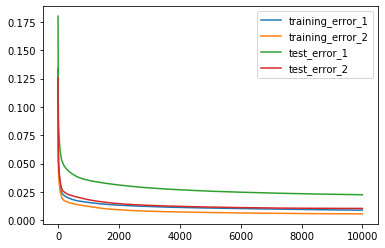

In [480]:
nn = NN(rbf_nodes)
nn.add_layer(2, function=Linear())
tr_curve, ts_curve = nn.train_batch(x_ball_rbf,y_ball,len(x_ball), 10000, 0.2, 0, learning_curve=True, test_set=x_test_ball_rbf, test_targets=y_test_ball)
plt.plot(tr_curve[:,0], label="training_error_1")
plt.plot(tr_curve[:,1], label="training_error_2")
plt.plot(ts_curve[:,0], label="test_error_1")
plt.plot(ts_curve[:,1], label="test_error_2")
print("train er", tr_curve[-1])
print("test er", ts_curve[-1])
plt.legend()

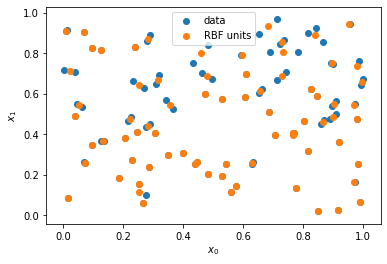

In [482]:
plt.scatter(x_ball[:,0],x_ball[:,1], label="data")
plt.scatter(rbf.means[:,0], rbf.means[:,1], label="RBF units")
plt.legend()
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.savefig("Lab_2_data/rbf_centers_fsca.png")

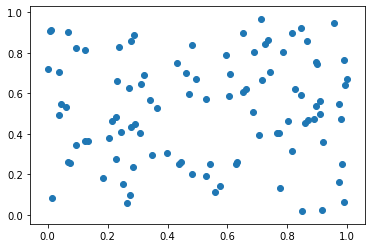

In [445]:
plt.scatter(x_ball[:,0],x_ball[:,1])

In [464]:
np.mean(ts_curve[-1]/tr_curve[-1])

1.5118174211847881

In [417]:
l[1]

array([0.09618512, 0.2858358 ])